In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [4]:
data = pd.read_csv("data/song_data.csv")
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [7]:
kmeans = MiniBatchKMeans(n_clusters=75)
kmeans.fit(data.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'],axis=1))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=75, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [33]:
kmeans.cluster_centers_

array([[0.09131569, 0.63534921, 0.74279365, 0.71069841, 0.59657143,
        0.07524921, 0.45680952],
       [0.09959198, 0.68134029, 0.85016026, 0.00835001, 0.10340428,
        0.07481789, 0.68890889],
       [0.67189614, 0.57946588, 0.44272997, 0.03865974, 0.12460653,
        0.06816528, 0.16324659],
       [0.90976136, 0.60598485, 0.1923278 , 0.88561742, 0.11318144,
        0.07734735, 0.2595    ],
       [0.15898178, 0.73827009, 0.53717949, 0.01042703, 0.1366    ,
        0.07591607, 0.36738632],
       [0.46852133, 0.67731991, 0.56040995, 0.00729802, 0.13205853,
        0.0621154 , 0.70919905],
       [0.02894539, 0.56943658, 0.87219301, 0.00877679, 0.13943401,
        0.07096949, 0.48048346],
       [0.04732699, 0.70095714, 0.59052857, 0.8159    , 0.12683143,
        0.06881964, 0.29620036],
       [0.04436932, 0.56772085, 0.70608952, 0.0125799 , 0.13009623,
        0.05263216, 0.25374782],
       [0.12644475, 0.73122637, 0.71118462, 0.0043529 , 0.31729231,
        0.09713033, 0.6

In [35]:
info = pd.read_csv("data/song_info.csv")
info.groupby("playlist").nunique()

,song_name,artist_name,album_names,playlist
playlist,,,,
00s Rock Anthems,60,52,57,1
100% LatinX,59,57,59,1
2000s Smash Hits,80,41,66,1
50 Latin Classics,50,49,49,1
60s Rock Anthems,100,62,92,1
...,...,...,...,...
Workout Twerkout,49,38,47,1
You & Me,100,79,86,1
Young & Free,100,91,100,1


In [36]:
df = data.to_numpy()

In [37]:
df[:,1]

array([73, 66, 76, ..., 23, 55, 60], dtype=object)

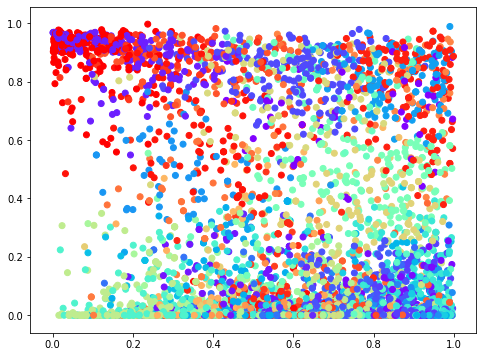

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(df[:,5], df[:,6], c=kmeans.labels_, cmap='rainbow')

In [39]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_
shotgun_georgeezra_cluster = cluster_map.iloc[18177][1]
shotgun_georgeezra_cluster

31

In [40]:
combined_data = data.join(info.drop("song_name",axis=1)).join(cluster_map.drop("data_index",axis=1)).drop_duplicates(subset=['song_name',"artist_name","song_duration_ms"],keep="last")

In [41]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster].describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,45.797170,220059.061321,0.343731,0.530278,0.716373,0.003596,5.283019,0.177987,-6.893580,0.707547,0.059533,128.475245,3.990566,0.751439,31.0
std,19.736448,64697.560925,0.085269,0.090363,0.098668,0.013251,3.482535,0.097934,2.490804,0.455966,0.040559,34.676394,0.194487,0.090791,0.0
min,0.000000,109666.000000,0.147000,0.221000,0.412000,0.000000,0.000000,0.037600,-13.945000,0.000000,0.022400,67.055000,3.000000,0.563000,31.0
25%,32.750000,179222.750000,0.284750,0.466750,0.654750,0.000000,2.000000,0.099150,-8.535000,0.000000,0.034150,98.256000,4.000000,0.690750,31.0
50%,48.000000,211601.500000,0.344500,0.541000,0.710000,0.000002,6.000000,0.150000,-6.518500,1.000000,0.044850,125.245000,4.000000,0.743500,31.0
75%,62.000000,246821.750000,0.404250,0.589000,0.785000,0.000200,8.000000,0.238250,-4.997500,1.000000,0.068825,155.120250,4.000000,0.812250,31.0
max,93.000000,622520.000000,0.534000,0.713000,0.971000,0.121000,11.000000,0.428000,-1.865000,1.000000,0.263000,203.927000,5.000000,0.970000,31.0


In [42]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
18177,Shotgun,93,201287,0.286,0.672,0.735,0.000000,5,0.2420,-4.733,1,0.0457,115.741,4,0.754,George Ezra,Staying at Tamara's,Weekend Hangouts,31
17232,Say My Name,78,271333,0.273,0.713,0.678,0.000000,5,0.1490,-3.525,0,0.1020,138.009,4,0.734,Destiny's Child,The Writing's On The Wall,Throwback Workout,31
8519,Mr. Jones,78,272506,0.211,0.581,0.817,0.000001,0,0.2460,-6.542,1,0.0382,141.607,4,0.779,Counting Crows,August And Everything After,Have a Great Day!,31
8870,Drowns The Whiskey (feat. Miranda Lambert),76,202066,0.294,0.552,0.698,0.000103,8,0.0905,-4.817,1,0.0306,90.006,4,0.600,Jason Aldean,Rearview Town,Hot Country,31
14643,El Amante,76,219506,0.243,0.683,0.691,0.000000,8,0.1400,-5.535,1,0.0432,179.910,4,0.732,Nicky Jam,Fénix,Represent_ Puerto Rico,31
8568,The Joker,75,264503,0.394,0.424,0.446,0.000004,5,0.1600,-9.618,1,0.0525,165.158,4,0.794,Steve Miller Band,The Joker,Have a Great Day!,31
451,The Boys Are Back in Town,74,266720,0.234,0.445,0.706,0.000252,8,0.2050,-9.803,1,0.0461,80.823,4,0.768,Thin Lizzy,Jailbreak (Deluxe Edition),70s Rock Anthems,31
2110,Riders On The Storm,74,434720,0.250,0.549,0.722,0.013800,11,0.1100,-11.729,0,0.0283,103.885,4,0.716,The Doors,L.A. Woman,All Out 60s,31
2123,I Want To Hold Your Hand - Remastered 2015,74,145746,0.386,0.490,0.715,0.000000,7,0.3110,-5.549,1,0.0476,130.726,4,0.866,The Beatles,1 (Remastered),All Out 60s,31
15763,Africa,73,238148,0.238,0.500,0.770,0.006360,8,0.1040,-5.059,1,0.0432,92.223,4,0.633,Weezer,Africa,Soft Pop Hits,31


In [43]:
shotgun_georgeezra_cluster_predict = kmeans.predict([[0.286,0.672,0.735,0.000000,0.242,0.0457,0.754]])[0]
shotgun_georgeezra_cluster_predict

31

In [44]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster_predict].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
18177,Shotgun,93,201287,0.286,0.672,0.735,0.000000,5,0.2420,-4.733,1,0.0457,115.741,4,0.754,George Ezra,Staying at Tamara's,Weekend Hangouts,31
17232,Say My Name,78,271333,0.273,0.713,0.678,0.000000,5,0.1490,-3.525,0,0.1020,138.009,4,0.734,Destiny's Child,The Writing's On The Wall,Throwback Workout,31
8519,Mr. Jones,78,272506,0.211,0.581,0.817,0.000001,0,0.2460,-6.542,1,0.0382,141.607,4,0.779,Counting Crows,August And Everything After,Have a Great Day!,31
8870,Drowns The Whiskey (feat. Miranda Lambert),76,202066,0.294,0.552,0.698,0.000103,8,0.0905,-4.817,1,0.0306,90.006,4,0.600,Jason Aldean,Rearview Town,Hot Country,31
14643,El Amante,76,219506,0.243,0.683,0.691,0.000000,8,0.1400,-5.535,1,0.0432,179.910,4,0.732,Nicky Jam,Fénix,Represent_ Puerto Rico,31
8568,The Joker,75,264503,0.394,0.424,0.446,0.000004,5,0.1600,-9.618,1,0.0525,165.158,4,0.794,Steve Miller Band,The Joker,Have a Great Day!,31
451,The Boys Are Back in Town,74,266720,0.234,0.445,0.706,0.000252,8,0.2050,-9.803,1,0.0461,80.823,4,0.768,Thin Lizzy,Jailbreak (Deluxe Edition),70s Rock Anthems,31
2110,Riders On The Storm,74,434720,0.250,0.549,0.722,0.013800,11,0.1100,-11.729,0,0.0283,103.885,4,0.716,The Doors,L.A. Woman,All Out 60s,31
2123,I Want To Hold Your Hand - Remastered 2015,74,145746,0.386,0.490,0.715,0.000000,7,0.3110,-5.549,1,0.0476,130.726,4,0.866,The Beatles,1 (Remastered),All Out 60s,31
15763,Africa,73,238148,0.238,0.500,0.770,0.006360,8,0.1040,-5.059,1,0.0432,92.223,4,0.633,Weezer,Africa,Soft Pop Hits,31


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df_train, df_test = train_test_split(data, train_size=0.6)

In [47]:
kmeans = MiniBatchKMeans(n_clusters=75)
kmeans.fit(df_train.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'],axis=1))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=75, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [48]:
result = kmeans.predict(df_test.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'], axis=1))
result

array([48, 20,  4, ..., 33, 28, 56])

In [49]:
df_test.insert(15,'cluster', result, True)

In [50]:
df_train.insert(15,'cluster',kmeans.labels_, True)

In [51]:
df_test[df_test['cluster'] == 37].drop_duplicates(subset=['song_name',"song_duration_ms"],keep="last").sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
13396,Sugarcane,74,144500,0.995,0.361,0.01650,0.967,0,0.0834,-27.874,1,0.0615,114.346,3,0.4520,37
13374,Talisman Stallion,74,120549,0.995,0.456,0.02400,0.956,5,0.1120,-22.890,1,0.0467,135.274,4,0.2200,37
4143,Gaze,72,160160,0.991,0.574,0.05770,0.912,3,0.1110,-22.165,0,0.0393,140.994,3,0.0849,37
4153,Remove The Complexities,72,135668,0.987,0.235,0.11100,0.949,4,0.1220,-21.701,1,0.0323,167.205,5,0.1040,37
13313,Norrsken,72,95316,0.980,0.278,0.04340,0.919,0,0.1210,-22.396,0,0.0383,133.853,4,0.0397,37
13329,Sunday Stroll,70,198826,0.993,0.277,0.12900,0.909,5,0.1750,-23.857,1,0.0607,118.425,4,0.2700,37
13317,A Time of Wonder,69,169617,0.990,0.290,0.19100,0.891,4,0.1010,-19.107,0,0.0377,165.536,3,0.2190,37
5912,Olancha Farewell,69,138426,0.992,0.196,0.00687,0.917,7,0.1060,-34.255,1,0.0442,72.125,4,0.0530,37
13305,Sycamore,69,67000,0.995,0.519,0.07860,0.953,3,0.1230,-20.894,0,0.0950,64.455,3,0.3140,37
4129,Fin,68,131280,0.994,0.336,0.03310,0.936,6,0.0892,-26.416,1,0.0420,106.361,4,0.0599,37


In [52]:
df_train[df_train['cluster'] == 37].sort_values(by=["song_popularity"],ascending=False).drop_duplicates(subset=['song_name',"song_duration_ms"],keep="last").head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
10663,River Flows In You - Original,76,185527,0.988,0.310,0.21800,0.952,9,0.0850,-21.398,1,0.0507,145.074,4,0.0969,37
13364,Tallis One,75,117401,0.993,0.410,0.01990,0.949,0,0.0897,-26.699,1,0.0449,107.378,4,0.1780,37
13337,The Watchtower,74,205577,0.991,0.248,0.02740,0.922,7,0.1530,-28.768,0,0.0333,75.124,1,0.1590,37
13301,Evolutionistically Yours,74,160897,0.993,0.322,0.01210,0.927,5,0.1270,-31.994,1,0.0491,112.464,4,0.1180,37
4130,A Catalogue Of Afternoons,72,110880,0.996,0.124,0.09240,0.848,11,0.0935,-31.726,1,0.0412,205.999,5,0.1350,37
13302,Atoms,72,139804,0.994,0.412,0.00289,0.937,2,0.0857,-29.012,1,0.0523,68.711,4,0.1710,37
4150,Nightingale (Scaled Down Version),70,128213,0.992,0.399,0.23300,0.755,0,0.1560,-15.423,1,0.0427,134.294,3,0.2530,37
4162,Sunday Stroll,70,198826,0.993,0.277,0.12900,0.909,5,0.1750,-23.857,1,0.0607,118.425,4,0.2700,37
13299,Naive Spin,70,158065,0.991,0.397,0.03150,0.926,7,0.0925,-22.308,0,0.0392,72.833,4,0.1800,37
13326,Traveling,70,119000,0.993,0.335,0.17000,0.955,10,0.1200,-20.236,1,0.0517,77.194,4,0.0781,37
